In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from scipy import stats
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

Data Pre-Processing

In [ ]:
a_df=pd.read_csv("Answer.csv")

In [ ]:
print(a_df.head())

  AnswerText  SurveyID  UserID  QuestionID
0         37      2014       1           1
1         44      2014       2           1
2         32      2014       3           1
3         31      2014       4           1
4         31      2014       5           1


In [ ]:
a_df.describe()

,SurveyID,UserID,QuestionID
count,236898.000000,236898.000000,236898.000000
mean,2016.572297,2514.516619,48.655898
std,1.421134,1099.462747,36.126215
min,2014.000000,1.000000,1.000000
25%,2016.000000,1691.000000,15.000000
50%,2016.000000,2652.000000,48.000000
75%,2017.000000,3439.000000,80.000000
max,2019.000000,4218.000000,118.000000


**Data Cleaning & Preprocessing**

<Axes: >

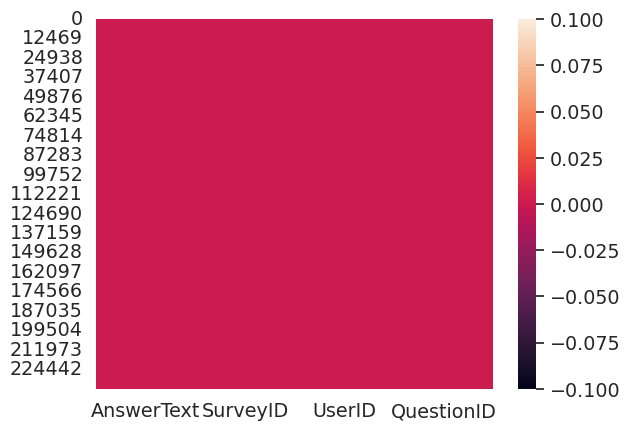

In [ ]:
sns.heatmap(a_df.isnull())

<ipython-input-321-aff162406568>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(a_df.corr())


<Axes: >

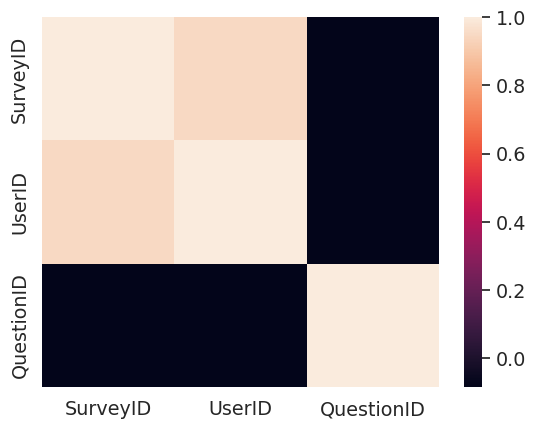

In [ ]:
sns.heatmap(a_df.corr())

In [ ]:
temp = a_df.sort_values(['UserID','QuestionID'])
f_one = temp[temp['SurveyID']==2014]
f_one

,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1260,Female,2014,1,2
2520,United States,2014,1,3
3780,Illinois,2014,1,4
5040,-1,2014,1,5
...,...,...,...,...
27719,Some of them,2014,1260,99
28979,No,2014,1260,100
30239,Maybe,2014,1260,101
31499,Yes,2014,1260,102


In [ ]:
f_one
max(f_one['UserID'])

1260

In [ ]:
f_one.shape

(32760, 4)

In [ ]:
#This is our final table, one which we are gng to use
new = f_one
new = new.drop(['SurveyID','UserID','QuestionID'],axis=1)
new = new.transpose()
new = pd.DataFrame(new.values.reshape(-1,26))
new
#new is our final table
#In column 3 , -1 means not from USA

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,37,Female,United States,Illinois,-1,No,1,6-25,1,Yes,...,Not sure,No,Yes,Somewhat easy,No,Some of them,Yes,Maybe,No,-1
1,44,Male,United States,Indiana,-1,No,0,More than 1000,0,Don't know,...,No,Don't know,Don't know,Don't know,Maybe,No,No,No,No,-1
2,32,Male,Canada,-1,-1,No,0,6-25,1,No,...,No,No,No,Somewhat difficult,No,Yes,Yes,Yes,No,-1
3,31,Male,United Kingdom,-1,-1,Yes,1,26-100,1,No,...,Yes,No,No,Somewhat difficult,Yes,Some of them,No,Maybe,Yes,-1
4,31,Male,United States,Texas,-1,No,0,100-500,1,Yes,...,No,Don't know,Don't know,Don't know,No,Some of them,Yes,Yes,No,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,32,Male,United States,Illinois,0,Yes,1,26-100,1,Yes,...,Yes,No,No,Somewhat difficult,No,Some of them,Yes,No,No,-1
1256,34,Male,United States,California,0,Yes,1,More than 1000,1,Yes,...,Yes,No,No,Somewhat difficult,Yes,No,No,No,No,-1
1257,46,Female,United States,North Carolina,0,No,0,100-500,1,No,...,Yes,No,No,Don't know,Yes,No,No,No,No,-1
1258,25,Male,United States,Illinois,0,Yes,1,26-100,0,Yes,...,Yes,No,No,Don't know,Maybe,Some of them,No,No,No,-1


In [ ]:
new.columns = ['Age',"Gender","Country","state","self_employed","family_history",	"treatment","work_interfere","no_employees","remote_work","tech_company",	"benefits",	"care_options	wellness_program",	"seek_help"	,"anonymity"	,"leave",	"mental_health_consequence",	"phys_health_consequence"	,"coworkers",	"supervisor",	"mental_health_interview",	"phys_health_interview",	"mental_vs_physical",	"obs_consequence"	,"comments","extra"]

In [ ]:
new = new.drop(['state','work_interfere', 'coworkers', 'mental_health_interview', 'obs_consequence','extra'],axis=1)

In [ ]:
gender = new['Gender'].unique()
#Getting rid of noise
stk_list = ['A little about you','Trans-female','Genderqueer', 'p','queer','A little about you','p','Androgyne','Neuter','Agender','fluid','Enby', 'non-binary','Nah','All','Genderqueer''Male-ish','something kinda male?','Guy (-ish) ^_^','male leaning androgynous','ostensibly male, unsure what that really means''Trans-female','queer/she/they','Trans woman','Female (trans)','Male-ish','something kinda male?','Guy (-ish) ^_^','male leaning androgynous','ostensibly male, unsure what that really means']
new = new[~new['Gender'].isin(stk_list)]
print(new['Gender'].unique())

['Female' 'Male']


In [ ]:
new

,Age,Gender,Country,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options\twellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,supervisor,phys_health_interview,mental_vs_physical,comments
0,37,Female,United States,-1,No,1,1,Yes,Yes,No,No,Yes,Often,No,Not sure,No,Somewhat easy,Some of them,Yes,No
1,44,Male,United States,-1,No,0,0,Don't know,Don't know,No,No,Don't know,Rarely,No,No,Don't know,Don't know,No,No,No
2,32,Male,Canada,-1,No,0,1,No,Don't know,Yes,No,No,Rarely,No,No,No,Somewhat difficult,Yes,Yes,No
3,31,Male,United Kingdom,-1,Yes,1,1,No,No,Maybe,Yes,No,Often,No,Yes,No,Somewhat difficult,Some of them,No,Yes
4,31,Male,United States,-1,No,0,1,Yes,Don't know,Yes,No,Don't know,Never,Yes,No,Don't know,Don't know,Some of them,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,32,Male,United States,0,Yes,1,1,Yes,Yes,No,No,Yes,Often,Yes,Yes,No,Somewhat difficult,Some of them,Yes,No
1256,34,Male,United States,0,Yes,1,1,Yes,Don't know,No,Yes,No,Sometimes,No,Yes,No,Somewhat difficult,No,No,No
1257,46,Female,United States,0,No,0,1,No,Don't know,No,No,No,-1,Yes,Yes,No,Don't know,No,No,No
1258,25,Male,United States,0,Yes,1,0,Yes,Yes,No,No,Don't know,Sometimes,No,Yes,No,Don't know,Some of them,No,No


In [ ]:
# # Encoding for categorical features

# # Bth column
new.replace(to_replace="Male", value=1, inplace=True)
new.replace(to_replace="Female", value=0, inplace=True)
new.replace(to_replace="Trans-female", value=-1, inplace=True)
# new.replace(to_replace = ['Male-ish','something kinda male?','Guy (-ish) ^_^','male leaning androgynous','ostensibly male, unsure what that really means'],value=0.5,inplace=True)
# new.replace(to_replace = ['Trans-female','queer/she/they','Trans woman','Female (trans)'],value=-0.5,inplace=True)
# new.replace(to_replace = ['queer','A little about you','p','Androgyne','Neuter','Agender','fluid','Enby', 'non-binary','Nah','All','Genderqueer'],value=-1,inplace=True)

# # Fth column
new.replace(to_replace="Yes", value=2, inplace=True)
new.replace(to_replace="No", value=-2, inplace=True)


# # ? column
new.replace(to_replace="Maybe", value=0, inplace=True)

# # Cth column
# new.replace(to_replace="United States", value=1, inplace=True)
# new.replace(to_replace=['Canada', 'United Kingdom', 'Bulgaria', 'France', 'Portugal',
#        'Netherlands', 'Switzerland', 'Poland', 'Australia', 'Germany',
#        'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica', 'Austria',
#        'Ireland', 'India', 'South Africa', 'Italy', 'Sweden', 'Colombia',
#        'Latvia', 'Romania', 'Belgium', 'New Zealand', 'Zimbabwe', 'Spain',
#        'Finland', 'Uruguay', 'Israel', 'Bosnia and Herzegovina',
#        'Hungary', 'Singapore', 'Japan', 'Nigeria', 'Croatia', 'Norway',
#        'Thailand', 'Denmark', 'Bahamas, The', 'Greece', 'Moldova',
#        'Georgia', 'China', 'Czech Republic', 'Philippines'],value=2,inplace=True)

# # Oth column
new.replace(to_replace='Often',value=-2,inplace=True)
new.replace(to_replace='Rarely',value=-1,inplace=True)
new.replace(to_replace='Never',value=1,inplace=True)
new.replace(to_replace='Sometimes',value=2,inplace=True)


# # Tth column
new.replace(to_replace="Don't know", value=-3, inplace=True)
new.replace(to_replace='Somewhat easy',value=5,inplace=True)
new.replace(to_replace='Somewhat difficult',value=6,inplace=True)
new.replace(to_replace='Very difficult',value=7,inplace=True)
new.replace(to_replace='Very easy',value=4,inplace=True)


# # Vth column
new.replace(to_replace='Some of them',value=0,inplace=True)
new.replace(to_replace='No',value=-9,inplace=True)
new.replace(to_replace='Yes',value=9,inplace=True)



# # Wth column
# new.replace(to_replace='Yes',value=10,inplace=True)
# new.replace(to_replace='No',value=-10,inplace=True)
new.replace(to_replace='Some of them',value=13,inplace=True)

# # Yth column
# new.replace(to_replace='Yes',value=11,inplace=True)
# new.replace(to_replace='No',value=-11,inplace=True)

# # Qth column
new.replace(to_replace='Not sure',value=16,inplace=True)



# new

In [ ]:
# Use this code in the new dataset to check whether string datas are present in any column

string_cols = new.select_dtypes(include=['object']).columns
print(string_cols.tolist())

# Convert some of the columns into integers (where some columns have only integers but stored as string/object type)
for i in range(2,6):
    new[string_cols.tolist()[i]] = new[string_cols.tolist()[i]].astype(int)
    
new['Gender']=new['Gender'].astype(int)



['Age', 'Country', 'self_employed', 'treatment', 'no_employees', 'anonymity']


In [ ]:
new.drop('Country',axis=1)

,Age,Gender,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options\twellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,supervisor,phys_health_interview,mental_vs_physical,comments
0,37,0,-1,-2,1,1,2,2,-2,-2,2,-2,-2,16,-2,5,0,2,-2
1,44,1,-1,-2,0,0,-3,-3,-2,-2,-3,-1,-2,-2,-3,-3,-2,-2,-2
2,32,1,-1,-2,0,1,-2,-3,2,-2,-2,-1,-2,-2,-2,6,2,2,-2
3,31,1,-1,2,1,1,-2,-2,0,2,-2,-2,-2,2,-2,6,0,-2,2
4,31,1,-1,-2,0,1,2,-3,2,-2,-3,1,2,-2,-3,-3,0,2,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,32,1,0,2,1,1,2,2,-2,-2,2,-2,2,2,-2,6,0,2,-2
1256,34,1,0,2,1,1,2,-3,-2,2,-2,2,-2,2,-2,6,-2,-2,-2
1257,46,0,0,-2,0,1,-2,-3,-2,-2,-2,-1,2,2,-2,-3,-2,-2,-2
1258,25,1,0,2,1,0,2,2,-2,-2,-3,2,-2,2,-2,-3,0,-2,-2


In [ ]:
new["anonymity"] = pd.to_numeric(new["anonymity"], errors='coerce').astype(int)
new.shape

(1238, 20)

In [ ]:
print(len(new.select_dtypes(include=['object']).columns))
print()
new.select_dtypes(include=['object'])
new["Age"] = pd.to_numeric(new["Age"], errors='coerce').astype(int)


2



In [ ]:
new = new.drop('Country',axis=1)

In [ ]:
new

,Age,Gender,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options\twellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,supervisor,phys_health_interview,mental_vs_physical,comments
0,37,0,-1,-2,1,1,2,2,-2,-2,2,-2,-2,16,-2,5,0,2,-2
1,44,1,-1,-2,0,0,-3,-3,-2,-2,-3,-1,-2,-2,-3,-3,-2,-2,-2
2,32,1,-1,-2,0,1,-2,-3,2,-2,-2,-1,-2,-2,-2,6,2,2,-2
3,31,1,-1,2,1,1,-2,-2,0,2,-2,-2,-2,2,-2,6,0,-2,2
4,31,1,-1,-2,0,1,2,-3,2,-2,-3,1,2,-2,-3,-3,0,2,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,32,1,0,2,1,1,2,2,-2,-2,2,-2,2,2,-2,6,0,2,-2
1256,34,1,0,2,1,1,2,-3,-2,2,-2,2,-2,2,-2,6,-2,-2,-2
1257,46,0,0,-2,0,1,-2,-3,-2,-2,-2,-1,2,2,-2,-3,-2,-2,-2
1258,25,1,0,2,1,0,2,2,-2,-2,-3,2,-2,2,-2,-3,0,-2,-2


In [ ]:
# Checking for Label Encoding

labelDict = {}
for feature in new:
    le = preprocessing.LabelEncoder()
    le.fit(new[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    new[feature] = le.transform(new[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
for key, value in labelDict.items():
    print(key, value)

label_Age [-29, -1, 5, 11, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72, 329]
label_Gender [0, 1]
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay']
label_self_employed [-1, 0, 1]
label_family_history [-2, 2]
label_treatment [0, 1]
label_no_employees [0, 1]
label_remote_work [-3, -2, 2]
label_tech_company [-3, -2, 2]
label_benefits [-2, 0, 2]
labe

In [ ]:
new

,Age,Gender,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options\twellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,supervisor,phys_health_interview,mental_vs_physical,comments
0,23,0,0,0,1,1,2,2,0,0,2,0,0,2,1,2,1,2,0
1,30,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,18,1,0,0,0,1,1,0,2,0,1,1,0,0,1,3,2,2,0
3,17,1,0,1,1,1,1,1,1,2,1,0,0,1,1,3,1,0,1
4,17,1,0,0,0,1,2,0,2,0,0,2,1,0,0,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,18,1,1,1,1,1,2,2,0,0,2,0,1,1,1,3,1,2,0
1256,20,1,1,1,1,1,2,0,0,2,1,3,0,1,1,3,0,0,0
1257,32,0,1,0,0,1,1,0,0,0,1,1,1,1,1,0,0,0,0
1258,11,1,1,1,1,0,2,2,0,0,0,3,0,1,1,0,1,0,0


In [ ]:
#Taking care and final checking of missing data
total = new.isnull().sum().sort_values(ascending=False)
percent = (new.isnull().sum()/new.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                                Total  Percent
Age                                 0      0.0
Gender                              0      0.0
mental_vs_physical                  0      0.0
phys_health_interview               0      0.0
supervisor                          0      0.0
phys_health_consequence             0      0.0
mental_health_consequence           0      0.0
leave                               0      0.0
anonymity                           0      0.0
seek_help                           0      0.0
care_options\twellness_program      0      0.0
benefits                            0      0.0
tech_company                        0      0.0
remote_work                         0      0.0
no_employees                        0      0.0
treatment                           0      0.0
family_history                      0      0.0
self_employed                       0      0.0
Country                             0      0.0
comments                            0      0.0


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


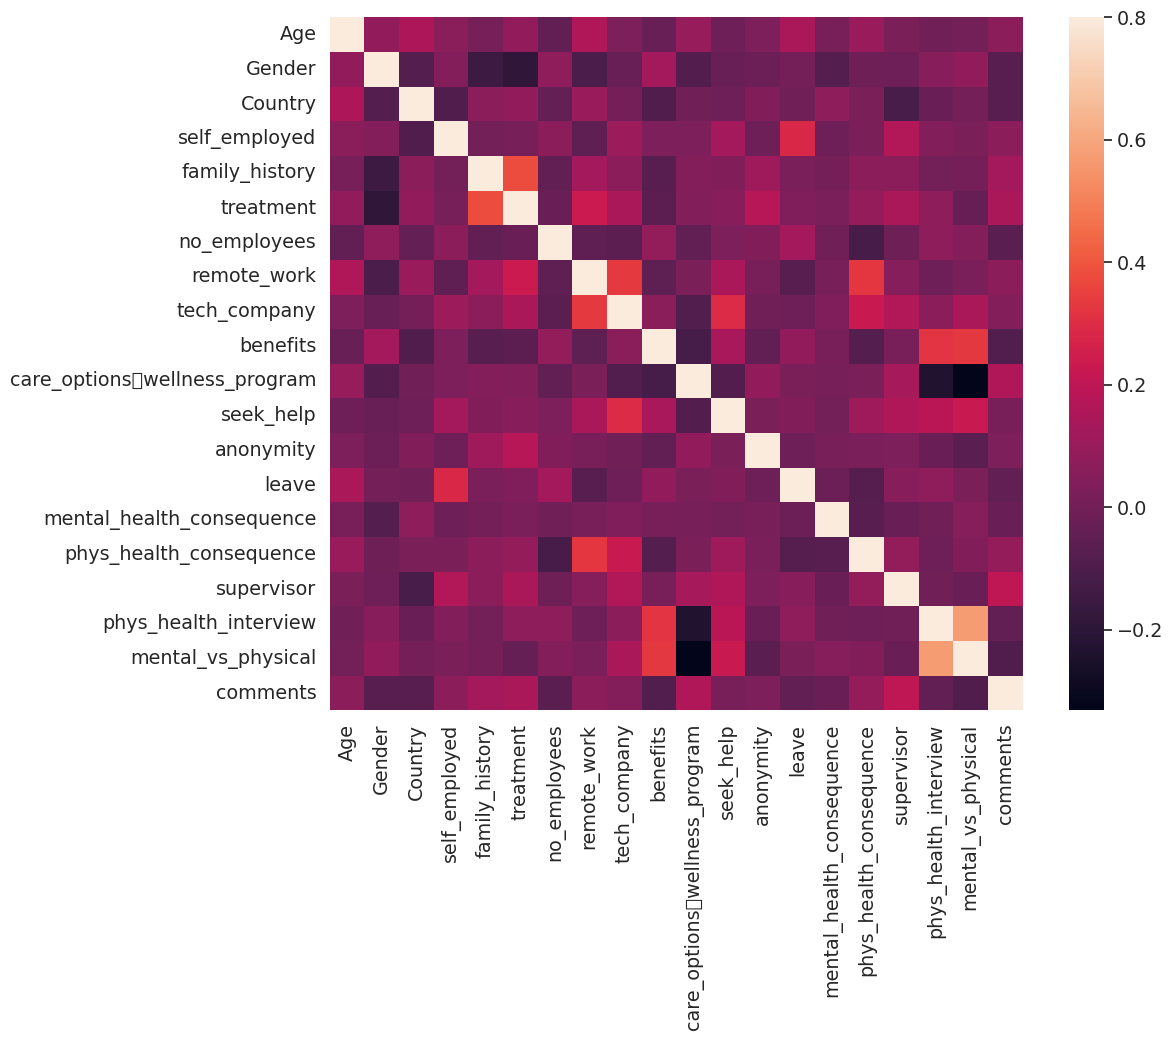

In [ ]:
#CORRELATION MATRIX
corrmat = new.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

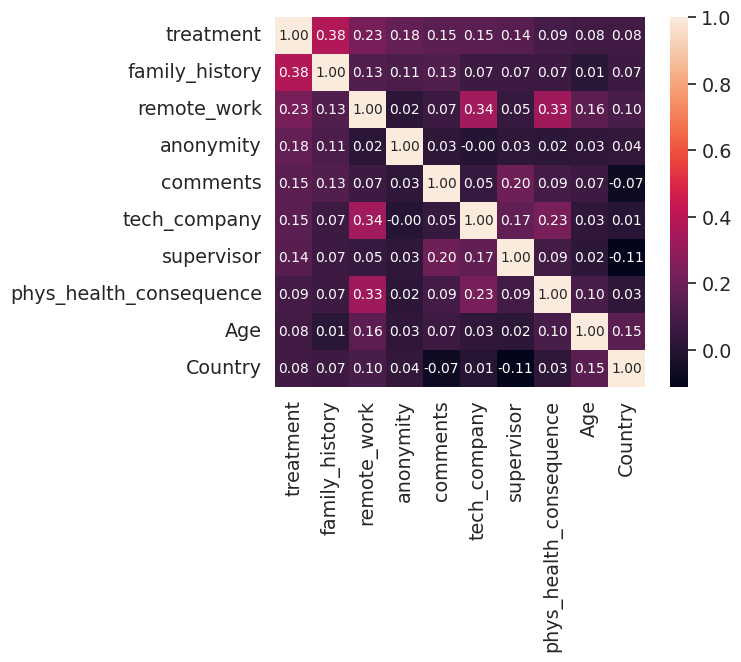

In [ ]:
k = 10 
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(new[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

<ipython-input-340-9159682c7efc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new["Age"], bins=24)


Text(0.5, 0, 'Age')

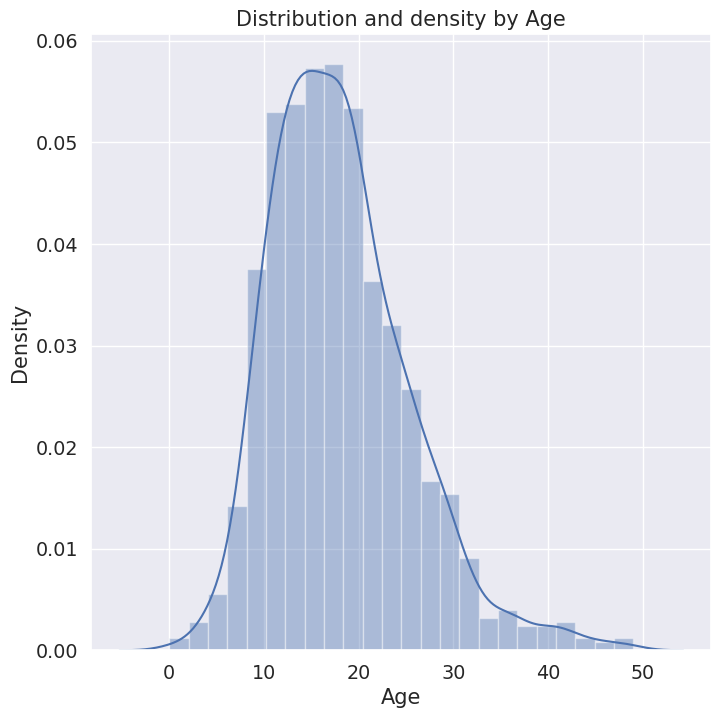

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(new["Age"], bins=24)
plt.title("Distribution and density by Age")
plt.xlabel("Age")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


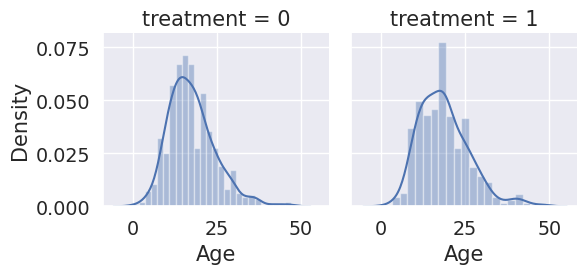

In [ ]:
j = sns.FacetGrid(new, col='treatment')
j = j.map(sns.distplot, "Age")

In [ ]:
scaler = MinMaxScaler()
new['Age'] = scaler.fit_transform(new[['Age']])
new

,Age,Gender,Country,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options\twellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,supervisor,phys_health_interview,mental_vs_physical,comments
0,0.469388,0,44,0,0,1,1,2,2,0,0,2,0,0,2,1,2,1,2,0
1,0.612245,1,44,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0.367347,1,6,0,0,0,1,1,0,2,0,1,1,0,0,1,3,2,2,0
3,0.346939,1,43,0,1,1,1,1,1,1,2,1,0,0,1,1,3,1,0,1
4,0.346939,1,44,0,0,0,1,2,0,2,0,0,2,1,0,0,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,0.367347,1,44,1,1,1,1,2,2,0,0,2,0,1,1,1,3,1,2,0
1256,0.408163,1,44,1,1,1,1,2,0,0,2,1,3,0,1,1,3,0,0,0
1257,0.653061,0,44,1,0,0,1,1,0,0,0,1,1,1,1,1,0,0,0,0
1258,0.224490,1,44,1,1,1,0,2,2,0,0,0,3,0,1,1,0,1,0,0


In [ ]:
new.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'no_employees', 'remote_work', 'tech_company', 'benefits',
       'care_options\twellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'supervisor',
       'phys_health_interview', 'mental_vs_physical', 'comments'],
      dtype='object')

In [ ]:
new['leave']

0       0
1       0
2       0
3       0
4       1
       ..
1255    1
1256    0
1257    1
1258    0
1259    0
Name: leave, Length: 1238, dtype: int64

In [ ]:
# define X and y
feature_cols1 = ['Age', 'Gender', 'self_employed', 'family_history','phys_health_consequence', 'supervisor']
X = new[feature_cols1]
y = new.treatment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [ ]:
new.shape

(1238, 20)

In [ ]:



# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define logistic regression function
def logistic_regression(X_train, y_train, X_test):
    # Initialize weights and bias
    n_features = X_train.shape[1]
    weights = np.zeros(n_features)
    bias = 0
    # Set learning rate and number of iterations
    learning_rate = 0.1
    n_iterations = 12000
    # Performing gradient descent
    for i in range(n_iterations):
        z = np.dot(X_train, weights) + bias
        y_predicted = sigmoid(z)
        dw = (1 / len(y_train)) * np.dot(X_train.T, (y_predicted - y_train))
        db = (1 / len(y_train)) * np.sum(y_predicted - y_train)
        weights -= learning_rate * dw
        bias -= learning_rate * db
    # Predict labels for test set
    y_predicted = sigmoid(np.dot(X_test, weights) + bias)
    return y_predicted



# Convert the dataset to a numpy array
new_array = new.values

# Split the dataset into training and testing sets
train_size = int(0.8 * len(new_array))
X_train, y_train = new_array[:train_size, :-1], new_array[:train_size, -1]
X_test, y_test = new_array[train_size:, :-1], new_array[train_size:, -1]

# Call the logistic regression function
y_predicted = logistic_regression(X_train, y_train, X_test)

# Round predicted probabilities to 0 or 1
y_predicted = np.round(y_predicted)

# Calculate accuracy
accuracy = np.sum(y_predicted == y_test) / len(y_test)

# Computing the Evaluation Metrics
def accuracy_score(y_true, y_pred):
    true_positives = 0
    true_negatives = 0

    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 1:
            true_positives += 1
        elif y_true[i] == 0 and y_pred[i] == 0:
            true_negatives += 1

    accuracy = (true_positives + true_negatives) / len(y_pred)
    # print(true_positives)
    # print(true_negatives)

    return accuracy


def recall_score(y_true, y_pred):
    true_positives = 0
    false_negatives = 0

    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 1:
            true_positives += 1
        elif y_true[i] == 1 and y_pred[i] == 0:
            false_negatives += 1

    recall = true_positives / (true_positives + false_negatives)

    return recall


def f1_score(y_true, y_pred):
    true_positives = 0
    false_positives = 0
    false_negatives = 0

    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 1:
            true_positives += 1
        elif y_true[i] == 0 and y_pred[i] == 1:
            false_positives += 1
        elif y_true[i] == 1 and y_pred[i] == 0:
            false_negatives += 1

    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)

    f1 = 2 * (precision * recall) / (precision + recall)

    return f1



def sensitivity_score(y_true, y_pred):
    true_positives = 0
    false_negatives = 0

    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 1:
            true_positives += 1
        elif y_true[i] == 1 and y_pred[i] == 0:
            false_negatives += 1

    sensitivity = true_positives / (true_positives + false_negatives)

    return sensitivity


def precision_score(y_true, y_pred):
    true_positives = 0
    false_positive = 0

    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 1:
            true_positives += 1
        elif y_true[i] == 0 and y_pred[i] == 1:
            false_positive += 1

    precision = true_positives / (true_positives + false_positive)

    return precision

# Print accuracy
print("Accuracy:",accuracy_score(y_test,y_predicted)*100)
print("Recall:",recall_score(y_test, y_predicted))
print("F1 Score:",f1_score(y_test, y_predicted))
print("Precision :",precision_score(y_test, y_predicted))
print("Sensitivity Score :", sensitivity_score(y_test, y_predicted))
print()
# Calculate and print confusion matrix, recall, precision, F1 score
cm = confusion_matrix(y_test, y_predicted)
print("Confusion Matrix:\n", cm)
print()
print("Confirmation of results with Scikit Inbuilt Functions")
print()
recall = recall_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted)
f1 = f1_score(y_test, y_predicted)
print("Accuracy:", accuracy*100)
print("Recall:", recall)
print("F1 Score:", f1)
print("Precision:", precision)

Accuracy: 39.11290322580645
Recall: 0.7777777777777778
F1 Score: 0.3167420814479638
Precision : 0.19886363636363635
Sensitivity Score : 0.7777777777777778

Confusion Matrix:
 [[ 62 141]
 [ 10  35]]

Confirmation of results with Scikit Inbuilt Functions

Accuracy: 39.11290322580645
Recall: 0.7777777777777778
F1 Score: 0.3167420814479638
Precision: 0.19886363636363635
